In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_path = r"./autodl-tmp/metadata.csv"

def show_df(csv_path):
    
    df = pd.read_csv(csv_path)
    
    print("CSV file loaded successfully!")
    print(f"Shape: {df.shape} (rows, columns)")
    print("\nFirst 5 rows:")
    display(df.head())
    
    print("\nData types:")
    display(df.dtypes)
    
    print("\nMissing values:")
    display(df.isnull().sum())
    
    numeric_columns = df.select_dtypes(include=['number']).columns
        
    if len(numeric_columns) > 1:
        plt.figure(figsize=(10, 8))
        correlation = df[numeric_columns].corr()
        sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation heatmap')
        plt.show()

In [3]:
show_df(csv_path)

CSV file loaded successfully!
Shape: (15209, 8) (rows, columns)

First 5 rows:


image_id            identity  \
0         0  LynxID2025_lynx_37   
1         1  LynxID2025_lynx_37   
2         2  LynxID2025_lynx_49   
3         3                 NaN   
4         4  LynxID2025_lynx_13   

                                                path date orientation species  \
0  images/LynxID2025/database/000f9ee1aad063a4485...  NaN       right    lynx   
1  images/LynxID2025/database/0020edb6689e9f78462...  NaN        left    lynx   
2  images/LynxID2025/database/003152e4145b5b69400...  NaN        left    lynx   
3  images/LynxID2025/query/003b89301c7b9f6d18f722...  NaN        back    lynx   
4  images/LynxID2025/database/003c3f82011e9c3f849...  NaN       right    lynx   

      split     dataset  
0  database  LynxID2025  
1  database  LynxID2025  
2  database  LynxID2025  
3     query  LynxID2025  
4  database  LynxID2025


Data types:


image_id        int64
identity       object
path           object
date           object
orientation    object
species        object
split          object
dataset        object
dtype: object


Missing values:


image_id          0
identity       2135
path              0
date           3907
orientation     703
species        1388
split             0
dataset           0
dtype: int64

In [4]:
csv_path = r"./autodl-tmp/metadata.csv"

output_path_sea_turtle = "SeaTurtle_metadata.csv"
output_path_train = "SeaTurtle_metadata_train.csv"
output_path_test = "SeaTurtle_metadata_test.csv"

df = pd.read_csv(csv_path)

print(f"Original shape: {df.shape}")

filtered_df_sea_turtle = df[df['dataset'] == 'SeaTurtleID2022'].copy()
print(f"SeaTurtleID2022 shape: {filtered_df_sea_turtle.shape}")
print(f"First 5 SeaTurtleID2022 rows:\n{filtered_df_sea_turtle.head()}")
filtered_df_sea_turtle.to_csv(output_path_sea_turtle, index=False)

train_df = filtered_df_sea_turtle[filtered_df_sea_turtle['split'] == 'database']
test_df = filtered_df_sea_turtle[filtered_df_sea_turtle['split'] == 'query']
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
train_df.to_csv(output_path_train, index=False)
test_df.to_csv(output_path_test, index=False)

print("Data processing complete.")

Original shape: (15209, 8)
SeaTurtleID2022 shape: (9229, 8)
First 5 SeaTurtleID2022 rows:
      image_id              identity  \
5980      5980  SeaTurtleID2022_t001   
5981      5981  SeaTurtleID2022_t001   
5982      5982  SeaTurtleID2022_t001   
5983      5983  SeaTurtleID2022_t001   
5984      5984  SeaTurtleID2022_t001   

                                                   path        date  \
5980  images/SeaTurtleID2022/database/turtles-data/d...  2014-07-14   
5981  images/SeaTurtleID2022/database/turtles-data/d...  2014-07-14   
5982  images/SeaTurtleID2022/database/turtles-data/d...  2014-07-14   
5983  images/SeaTurtleID2022/database/turtles-data/d...  2010-07-02   
5984  images/SeaTurtleID2022/database/turtles-data/d...  2014-07-14   

     orientation            species     split          dataset  
5980        left  loggerhead turtle  database  SeaTurtleID2022  
5981       right  loggerhead turtle  database  SeaTurtleID2022  
5982        left  loggerhead turtle  database  

In [5]:
csv_path = "SeaTurtle_metadata_train.csv"
show_df(csv_path)

CSV file loaded successfully!
Shape: (8729, 8) (rows, columns)

First 5 rows:


image_id              identity  \
0      5980  SeaTurtleID2022_t001   
1      5981  SeaTurtleID2022_t001   
2      5982  SeaTurtleID2022_t001   
3      5983  SeaTurtleID2022_t001   
4      5984  SeaTurtleID2022_t001   

                                                path        date orientation  \
0  images/SeaTurtleID2022/database/turtles-data/d...  2014-07-14        left   
1  images/SeaTurtleID2022/database/turtles-data/d...  2014-07-14       right   
2  images/SeaTurtleID2022/database/turtles-data/d...  2014-07-14        left   
3  images/SeaTurtleID2022/database/turtles-data/d...  2010-07-02    topright   
4  images/SeaTurtleID2022/database/turtles-data/d...  2014-07-14       right   

             species     split          dataset  
0  loggerhead turtle  database  SeaTurtleID2022  
1  loggerhead turtle  database  SeaTurtleID2022  
2  loggerhead turtle  database  SeaTurtleID2022  
3  loggerhead turtle  database  SeaTurtleID2022  
4  loggerhead turtle  database  SeaTurtleID2022


Data types:


image_id        int64
identity       object
path           object
date           object
orientation    object
species        object
split          object
dataset        object
dtype: object


Missing values:


image_id         0
identity         0
path             0
date             0
orientation    203
species          0
split            0
dataset          0
dtype: int64

In [10]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from collections import Counter

BASE_PATH = "./autodl-tmp"
csv_path = "SeaTurtle_metadata_train.csv"

In [28]:
def show_random_images(csv_path, num_samples=9, display_size=(112, 112)):
    # Read image paths from CSV
    df = pd.read_csv(csv_path)
    
    # Randomly select rows without processing all images
    if len(df) > num_samples:
        sample_df = df.sample(num_samples)
    else:
        sample_df = df
        num_samples = len(df)
    
    # Calculate grid dimensions
    num_rows = int(np.ceil(np.sqrt(num_samples)))
    num_cols = int(np.ceil(num_samples / num_rows))
    
    # Create figure for image grid with minimal spacing
    fig = plt.figure(figsize=(6, 6))
    
    # Adjust spacing parameters
    plt.subplots_adjust(
        left=0.01,     # Left margin
        right=0.99,    # Right margin
        bottom=0.01,   # Bottom margin
        top=0.95,      # Top margin
        wspace=0.05,   # Width space between subplots
        hspace=0.05    # Height space between subplots
    )
    
    # plt.suptitle('Random Sample Images', fontsize=16, y=0.98)
    
    # Display images in grid
    for i, (_, row) in enumerate(sample_df.iterrows()):
        relative_path = row['path']
        full_path = os.path.join(BASE_PATH, relative_path)
        
        # Try to read image
        img = cv2.imread(full_path)
        
        if img is not None:
            # Convert BGR to RGB for display
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Resize image to uniform size
            img_resized = cv2.resize(img_rgb, display_size, interpolation=cv2.INTER_AREA)
            
            # Create subplot with minimal spacing
            ax = fig.add_subplot(num_rows, num_cols, i+1)
            ax.imshow(img_resized)
            ax.set_xticks([])    # Remove x-axis ticks
            ax.set_yticks([])    # Remove y-axis ticks
            ax.spines['top'].set_visible(False)      # Hide top border
            ax.spines['right'].set_visible(False)    # Hide right border
            ax.spines['bottom'].set_visible(False)   # Hide bottom border
            ax.spines['left'].set_visible(False)     # Hide left border
        else:
            # If image cannot be read, display empty subplot
            ax = fig.add_subplot(num_rows, num_cols, i+1)
            ax.text(0.5, 0.5, 'Not found', 
                    horizontalalignment='center', verticalalignment='center')
            ax.set_xticks([])
            ax.set_yticks([])
    
    plt.show()

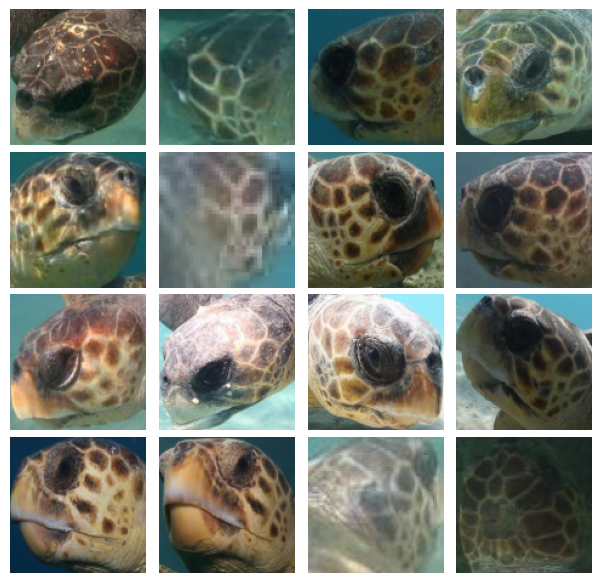

In [29]:
show_random_images(csv_path, num_samples=16)

In [33]:
def show_detail(csv_path):
    
    df = pd.read_csv(csv_path)
    
    image_stats = []
    
    for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Images"):
        relative_path = row['path']
        full_path = os.path.join(BASE_PATH, relative_path)
    
        img = cv2.imread(full_path)
    
        if img is None:
            image_stats.append({
                'path': full_path,
                'status': 'failed',
                'width': None,
                'height': None,
                'channels': None,
                'format': os.path.splitext(full_path)[1],
                'size_kb': os.path.getsize(full_path) / 1024 if os.path.exists(full_path) else None
            })
            continue
    
        height, width = img.shape[:2]
        channels = img.shape[2] if len(img.shape) > 2 else 1
        file_size = os.path.getsize(full_path) / 1024
        img_format = os.path.splitext(full_path)[1]
    
        brightness = np.mean(img)
        contrast = np.std(img)
    
        image_stats.append({
            'path': full_path,
            'status': 'success',
            'width': width,
            'height': height,
            'channels': channels,
            'format': img_format,
            'size_kb': file_size,
            'brightness': brightness,
            'contrast': contrast
        })
    
    stats_df = pd.DataFrame(image_stats)
    
    print("Image Statistics Summary:")
    print(f"Total Images: {len(stats_df)}")
    print(f"Successfully Read: {sum(stats_df['status'] == 'success')}")
    print(f"Failed to Read: {sum(stats_df['status'] == 'failed')}")
    
    if sum(stats_df['status'] == 'success') > 0:
        success_stats = stats_df[stats_df['status'] == 'success']
    
        print("\nSize Distribution:")
        size_counter = Counter(success_stats.apply(lambda x: f"{int(x['width'])}x{int(x['height'])}", axis=1))
        for size, count in size_counter.most_common(10):
            print(f"  {size}: {count} images")
    
        print("\nFormat Distribution:")
        format_counter = Counter(success_stats['format'])
        for fmt, count in format_counter.most_common():
            print(f"  {fmt}: {count} images")
    
        print("\nChannel Distribution:")
        channel_counter = Counter(success_stats['channels'])
        for ch, count in channel_counter.most_common():
            print(f"  {ch} channels: {count} images")
    
        print("\nFile Size Statistics (KB):")
        print(f"  Min: {success_stats['size_kb'].min():.2f}")
        print(f"  Mean: {success_stats['size_kb'].mean():.2f}")
        print(f"  Max: {success_stats['size_kb'].max():.2f}")
    
        print("\nBrightness Statistics:")
        print(f"  Min: {success_stats['brightness'].min():.2f}")
        print(f"  Mean: {success_stats['brightness'].mean():.2f}")
        print(f"  Max: {success_stats['brightness'].max():.2f}")
    
        print("\nContrast Statistics:")
        print(f"  Min: {success_stats['contrast'].min():.2f}")
        print(f"  Mean: {success_stats['contrast'].mean():.2f}")
        print(f"  Max: {success_stats['contrast'].max():.2f}")
    
        unique_sizes = success_stats.apply(lambda x: f"{x['width']}x{x['height']}", axis=1).nunique()
        print(f"\nTotal Unique Image Sizes: {unique_sizes}")
    
        print("\nWidth Statistics (pixels):")
        print(f"  Min: {success_stats['width'].min()}")
        print(f"  Mean: {success_stats['width'].mean():.2f}")
        print(f"  Max: {success_stats['width'].max()}")
    
        print("\nHeight Statistics (pixels):")
        print(f"  Min: {success_stats['height'].min()}")
        print(f"  Mean: {success_stats['height'].mean():.2f}")
        print(f"  Max: {success_stats['height'].max()}")
    
        success_stats['aspect_ratio'] = success_stats['width'] / success_stats['height']
        print("\nAspect Ratio Statistics:")
        print(f"  Min: {success_stats['aspect_ratio'].min():.2f}")
        print(f"  Mean: {success_stats['aspect_ratio'].mean():.2f}")
        print(f"  Max: {success_stats['aspect_ratio'].max():.2f}")
    
        plt.figure(figsize=(12, 6))
        plt.scatter(success_stats['width'], success_stats['height'], alpha=0.5, s=3)
        plt.xlabel('Width (pixels)')
        plt.ylabel('Height (pixels)')
        # plt.title('Image Size Distribution')
        plt.tight_layout()

        plt.savefig('image_size_distribution.png')

Processing Images: 100%|██████████| 8729/8729 [00:20<00:00, 426.35it/s]


Image Statistics Summary:
Total Images: 8729
Successfully Read: 8729
Failed to Read: 0

Size Distribution:
  2000x1333: 182 images
  2000x1500: 12 images
  1333x2000: 6 images
  115x97: 5 images
  52x37: 5 images
  91x76: 5 images
  86x66: 5 images
  65x48: 5 images
  137x117: 4 images
  78x63: 4 images

Format Distribution:
  .JPG: 5949 images
  .jpeg: 1489 images
  .jpg: 1291 images

Channel Distribution:
  3 channels: 8729 images

File Size Statistics (KB):
  Min: 0.63
  Mean: 15.40
  Max: 439.27

Brightness Statistics:
  Min: 11.89
  Mean: 92.80
  Max: 210.87

Contrast Statistics:
  Min: 5.69
  Mean: 37.73
  Max: 80.73

Total Unique Image Sizes: 7482

Width Statistics (pixels):
  Min: 16
  Mean: 282.39
  Max: 2000

Height Statistics (pixels):
  Min: 11
  Mean: 234.24
  Max: 2000

Aspect Ratio Statistics:
  Min: 0.47
  Mean: 1.20
  Max: 3.88


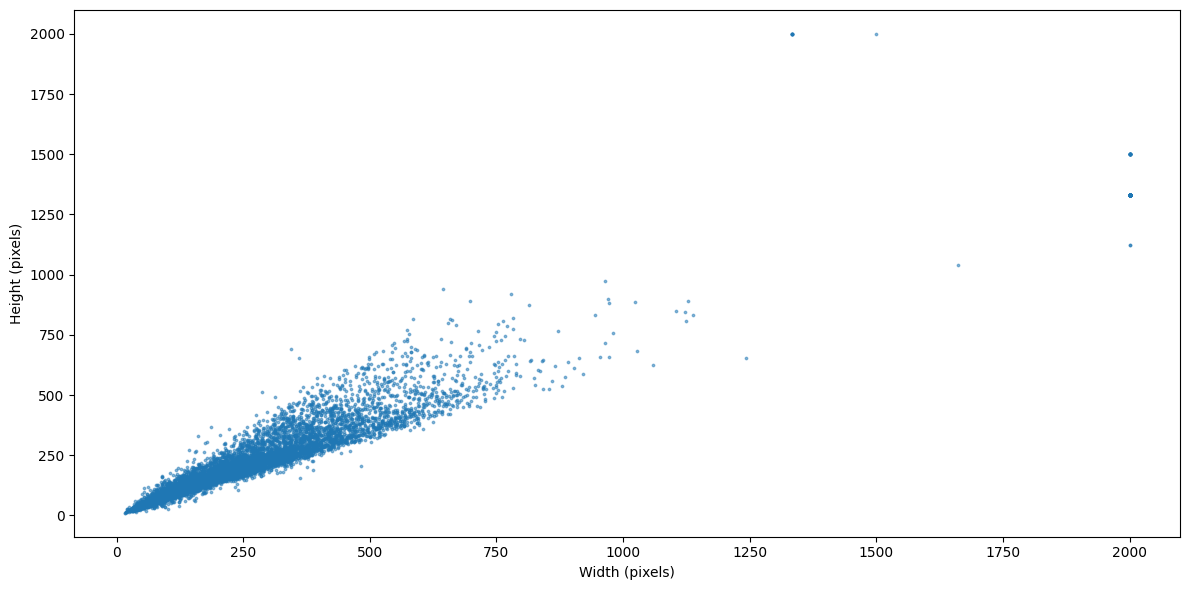

In [34]:
show_detail(csv_path)

In [10]:
BASE_PATH = "./autodl-tmp"
input_path = "SeaTurtle_metadata_train.csv"
output_path = "SeaTurtle_size_clean.csv"
MIN_SIZE = 100
MAX_SIZE = 2000

df = pd.read_csv(input_path)
total_images = len(df)
print(f"Total images: {total_images}")

df['width'] = None
df['height'] = None

print("Reading image dimensions...")
for idx, row in tqdm(df.iterrows(), total=len(df)):
    img_path = os.path.join(BASE_PATH, row['path'])
    try:
        img = cv2.imread(img_path)
        if img is not None:
            height, width = img.shape[:2]
            df.at[idx, 'width'] = width
            df.at[idx, 'height'] = height
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

filtered_df = df[(df['width'] > MIN_SIZE) & (df['width'] < MAX_SIZE) &
                   (df['height'] > MIN_SIZE) & (df['height'] < MAX_SIZE)]

filtered_count = len(filtered_df)
print(f"Filtered images: {filtered_count}")
print(f"Removed: {total_images - filtered_count}")
print(f"Retention: {filtered_count/total_images:.2%}")

valid_size_df = df.dropna(subset=['width', 'height'])
small_images_df = valid_size_df[(valid_size_df['width'] <= MIN_SIZE) | (valid_size_df['height'] <= MIN_SIZE)]
large_images_df = valid_size_df[(valid_size_df['width'] >= MAX_SIZE) | (valid_size_df['height'] >= MAX_SIZE)]

print(f"\nRemoved small: {len(small_images_df)}")
print(f"Removed large: {len(large_images_df)}")

filtered_df.to_csv(output_path, index=False)
print(f"\nSaved to: {output_path}")

Total images: 8729
Reading image dimensions...


100%|██████████| 8729/8729 [00:05<00:00, 1497.00it/s]


Filtered images: 6472
Removed: 2257
Retention: 74.14%

Removed small: 2054
Removed large: 203

Saved to: SeaTurtle_size_clean.csv



Showing some small images:


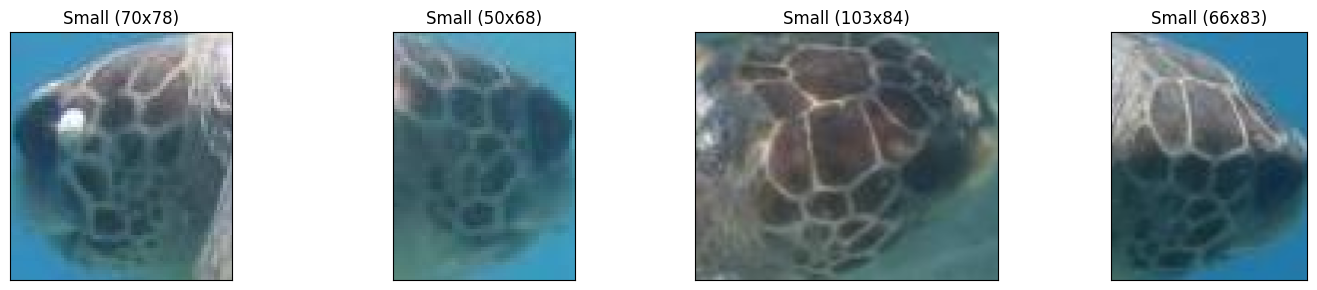


Showing some large images:


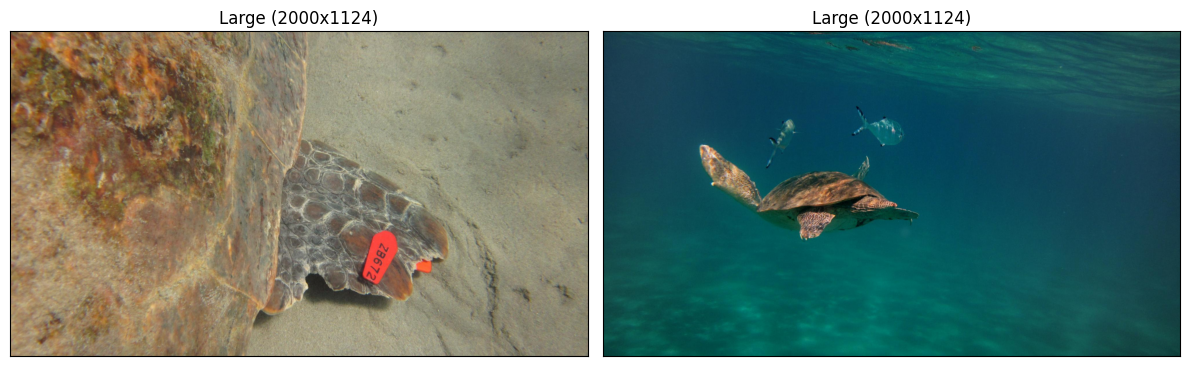

In [11]:
def show_images(image_paths, titles, cols=5, fig_size=(15, 3)):
    plt.figure(figsize=fig_size)
    for i, (path, title) in enumerate(zip(image_paths, titles)):
        plt.subplot(1, len(image_paths), i + 1)
        img = cv2.imread(path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            plt.title(title)
            plt.xticks([])
            plt.yticks([])
        else:
            plt.title(f"Could not read: {title}")
    plt.tight_layout()
    plt.show()

num_small_to_show = min(4, len(small_images_df))
if num_small_to_show > 0:
    small_paths = [os.path.join(BASE_PATH, row['path']) for _, row in small_images_df.head(num_small_to_show).iterrows()]
    small_titles = [f"Small ({row['width']}x{row['height']})" for _, row in small_images_df.head(num_small_to_show).iterrows()]
    print("\nShowing some small images:")
    show_images(small_paths, small_titles, cols=num_small_to_show)

num_large_to_show = min(2, len(large_images_df))
if num_large_to_show > 0:
    large_paths = [os.path.join(BASE_PATH, row['path']) for _, row in large_images_df.head(num_large_to_show).iterrows()]
    large_titles = [f"Large ({row['width']}x{row['height']})" for _, row in large_images_df.head(num_large_to_show).iterrows()]
    print("\nShowing some large images:")
    show_images(large_paths, large_titles, cols=num_large_to_show, fig_size=(12, 6))

Processing Images: 100%|██████████| 6472/6472 [00:09<00:00, 705.92it/s]


Image Statistics Summary:
Total Images: 6472
Successfully Read: 6472
Failed to Read: 0

Size Distribution:
  137x117: 4 images
  194x166: 4 images
  229x192: 4 images
  177x157: 3 images
  263x208: 3 images
  175x169: 3 images
  137x140: 3 images
  146x118: 3 images
  124x112: 3 images
  158x132: 3 images

Format Distribution:
  .JPG: 4462 images
  .jpeg: 1096 images
  .jpg: 914 images

Channel Distribution:
  3 channels: 6472 images

File Size Statistics (KB):
  Min: 1.01
  Mean: 14.18
  Max: 186.53

Brightness Statistics:
  Min: 22.38
  Mean: 94.25
  Max: 200.87

Contrast Statistics:
  Min: 7.75
  Mean: 40.87
  Max: 78.27

Total Unique Image Sizes: 5930

Width Statistics (pixels):
  Min: 101
  Mean: 293.18
  Max: 1660

Height Statistics (pixels):
  Min: 101
  Mean: 251.98
  Max: 1040

Aspect Ratio Statistics:
  Min: 0.48
  Mean: 1.18
  Max: 2.34


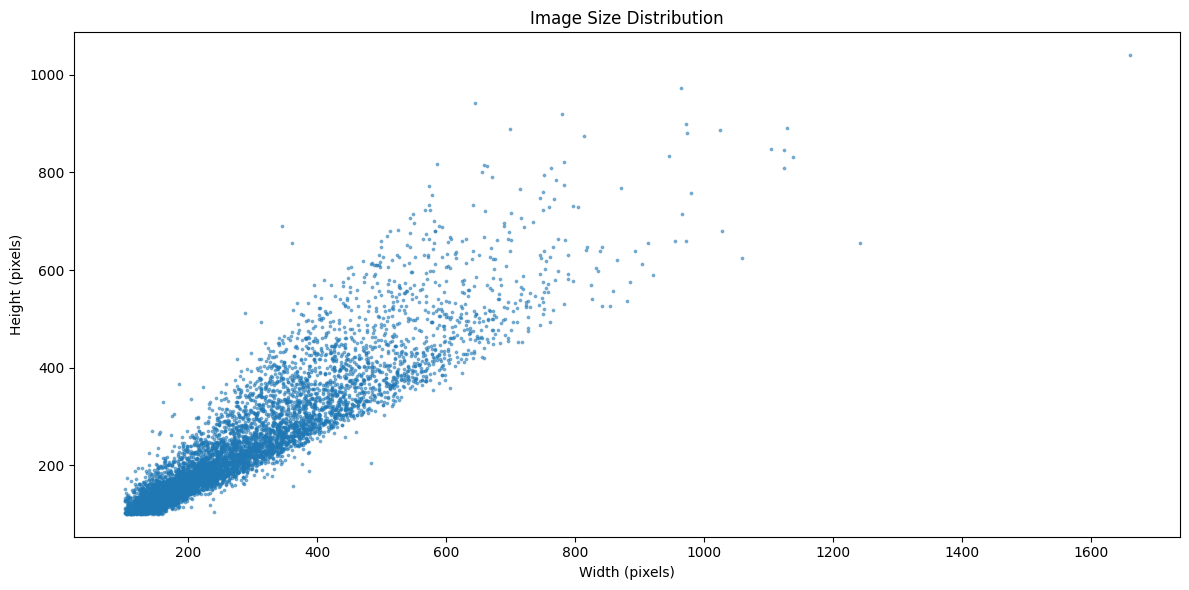

In [12]:
csv_path = "SeaTurtle_size_clean.csv"
show_detail(csv_path)

In [13]:
BASE_PATH = "./autodl-tmp"
input_path = "SeaTurtle_size_clean.csv"
output_path = "SeaTurtle_quality_analysis.csv"

df = pd.read_csv(input_path)
total_images = len(df)
print(f"Total images: {total_images}")

df['width'] = None
df['height'] = None
df['mean_brightness'] = None
df['std_brightness'] = None
df['mean_saturation'] = None
df['std_saturation'] = None
df['contrast'] = None
df['blurriness'] = None

for idx, row in tqdm(df.iterrows(), total=len(df)):
    img_path = os.path.join(BASE_PATH, row['path'])
    try:
        img = cv2.imread(img_path)
        if img is not None:
            height, width = img.shape[:2]
            df.at[idx, 'width'] = width
            df.at[idx, 'height'] = height
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            df.at[idx, 'mean_brightness'] = np.mean(gray_img)
            df.at[idx, 'std_brightness'] = np.std(gray_img)
            hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            saturation = hsv_img[:, :, 1]
            df.at[idx, 'mean_saturation'] = np.mean(saturation)
            df.at[idx, 'std_saturation'] = np.std(saturation)
            df.at[idx, 'contrast'] = np.std(gray_img)
            laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)
            df.at[idx, 'blurriness'] = np.var(laplacian)
        else:
            print(f"Could not read image: {img_path}")
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

df.to_csv(output_path, index=False)
print(f"\nSaved to: {output_path}")

Total images: 6472


100%|██████████| 6472/6472 [00:15<00:00, 429.90it/s]



Saved to: SeaTurtle_quality_analysis.csv


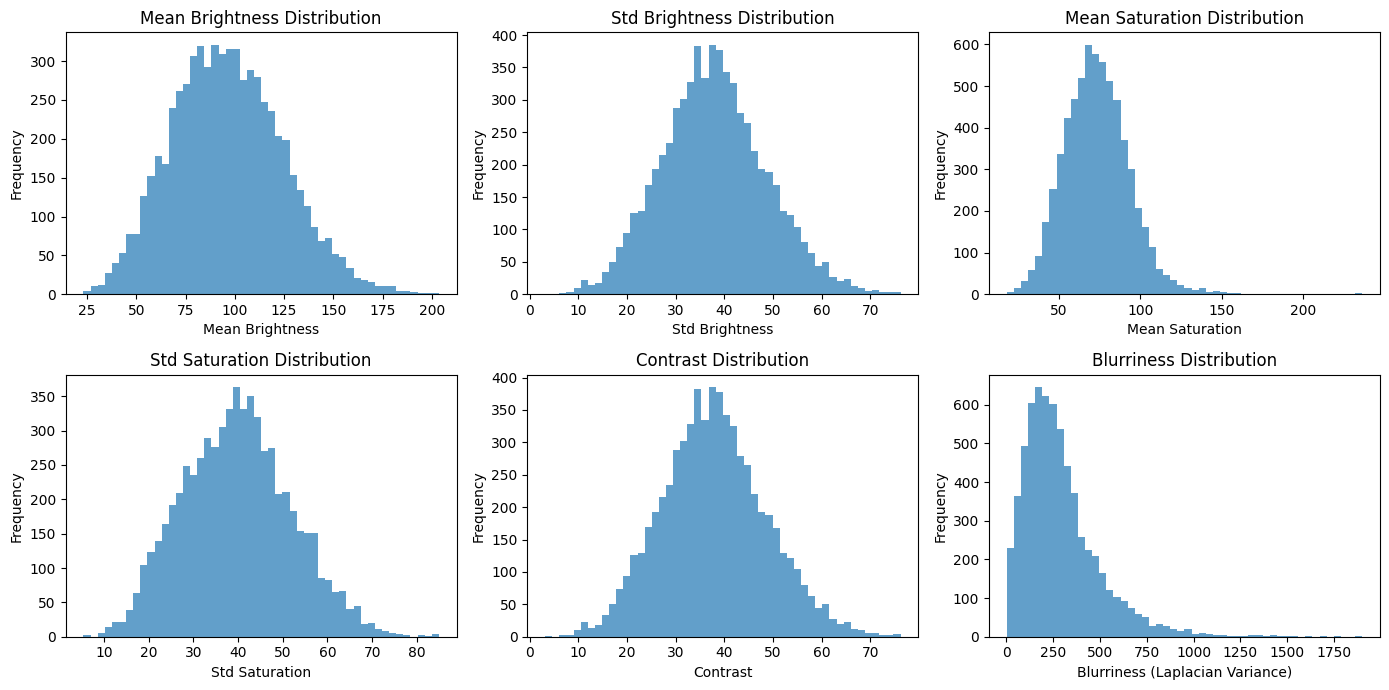

In [14]:
df_dropna = df.dropna(subset=['mean_brightness', 'std_brightness', 'mean_saturation', 'std_saturation', 'contrast', 'blurriness'])
plt.figure(figsize=(14, 7))

plt.subplot(2, 3, 1)
plt.hist(df_dropna['mean_brightness'], bins=50, alpha=0.7)
plt.title('Mean Brightness Distribution')
plt.xlabel('Mean Brightness')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(df_dropna['std_brightness'], bins=50, alpha=0.7)
plt.title('Std Brightness Distribution')
plt.xlabel('Std Brightness')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(df_dropna['mean_saturation'], bins=50, alpha=0.7)
plt.title('Mean Saturation Distribution')
plt.xlabel('Mean Saturation')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.hist(df_dropna['std_saturation'], bins=50, alpha=0.7)
plt.title('Std Saturation Distribution')
plt.xlabel('Std Saturation')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.hist(df_dropna['contrast'], bins=50, alpha=0.7)
plt.title('Contrast Distribution')
plt.xlabel('Contrast')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
plt.hist(df_dropna['blurriness'], bins=50, alpha=0.7)
plt.title('Blurriness Distribution')
plt.xlabel('Blurriness (Laplacian Variance)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [15]:
def get_image_quality(img_path):
    try:
        img = cv2.imread(img_path)
        if img is not None:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            mean_brightness = np.mean(gray_img)
            contrast = np.std(gray_img)
            laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)
            blurriness = np.var(laplacian)
            return {'mean_brightness': mean_brightness, 'contrast': contrast, 'blurriness': blurriness}
        else:
            return None
    except Exception as e:
        print(f"Error in get_image_quality for {img_path}: {e}")
        return None

def show_images(image_paths, titles, cols=5):
    plt.figure(figsize=(15, (len(image_paths) + cols - 1) // cols * 3))
    for i, (path, title) in enumerate(zip(image_paths, titles)):
        plt.subplot((len(image_paths) + cols - 1) // cols, cols, i + 1)
        img = cv2.imread(path)
        if img is not None:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(title)
            plt.xticks([]); plt.yticks([])
        else:
            plt.title(f"Fail: {title}")
    plt.tight_layout(); plt.show()

def find_problematic_images(
    df,
    base_path,
    mean_brightness_threshold_high=200,
    mean_brightness_threshold_low=50,
    blurriness_threshold_high=900,
    blurriness_threshold_low=50,
    max_show=5,
):
    bright_problems = []
    dark_problems = []
    blurry_problems = []
    blurry_problems_low = []

    print("\nAnalyzing image quality and identifying potential issues...")
    for index, row in tqdm(df.iterrows(), total=len(df)):
        img_path = os.path.join(base_path, row['path'])
        quality = get_image_quality(img_path)
        if quality:
            b = quality['mean_brightness']
            blur = quality['blurriness']
            if b > mean_brightness_threshold_high: bright_problems.append((img_path, f"Bright:{b:.0f}"))
            if b < mean_brightness_threshold_low: dark_problems.append((img_path, f"Dark:{b:.0f}"))
            if blur > blurriness_threshold_high: blurry_problems.append((img_path, f"BlurHigh:{blur:.0f}"))
            if blur < blurriness_threshold_low: blurry_problems_low.append((img_path, f"BlurLow:{blur:.0f}"))

    print("\nBright Images:")
    show_images([p for p, _ in bright_problems[:max_show]], [t for _, t in bright_problems[:max_show]])
    print("\nDark Images:")
    show_images([p for p, _ in dark_problems[:max_show]], [t for _, t in dark_problems[:max_show]])
    print("\nBlurry Images (High):")
    show_images([p for p, _ in blurry_problems[:max_show]], [t for _, t in blurry_problems[:max_show]])
    print("\nBlurry Images (Low):")
    show_images([p for p, _ in blurry_problems_low[:max_show]], [t for _, t in blurry_problems_low[:max_show]])


Analyzing image quality and identifying potential issues...


100%|██████████| 6472/6472 [00:08<00:00, 734.15it/s] 



Bright Images:


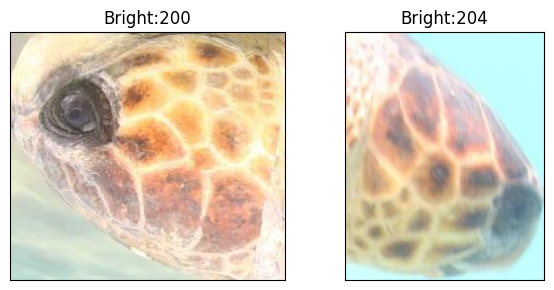


Dark Images:


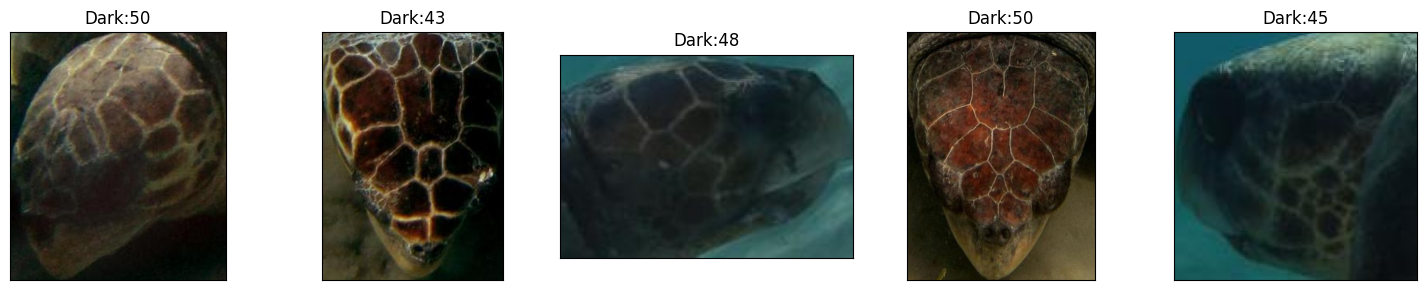


Blurry Images (High):


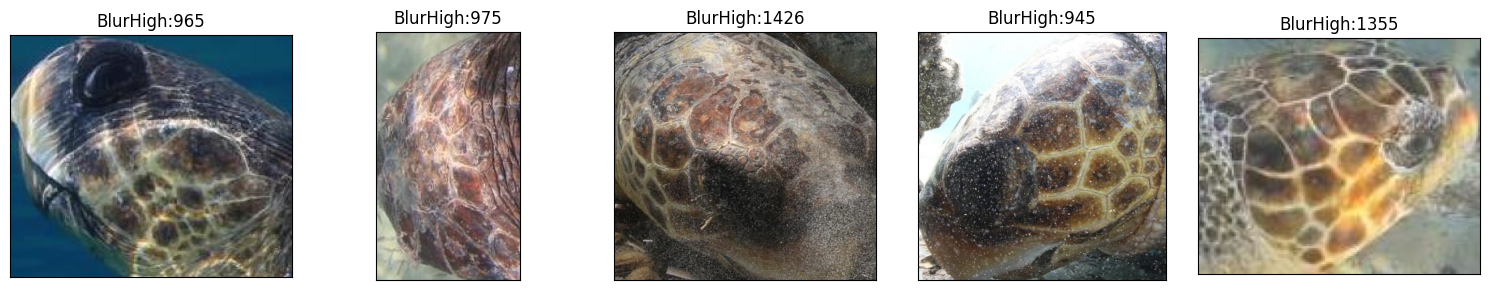


Blurry Images (Low):


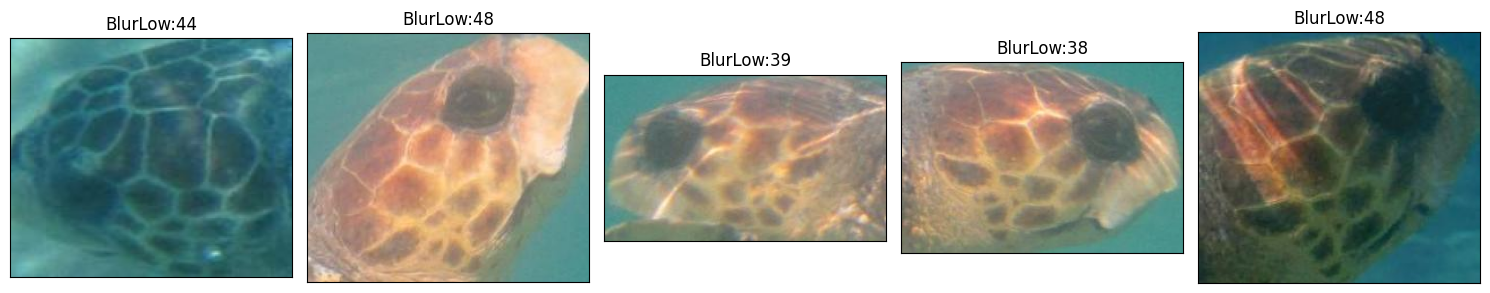

In [16]:
input_path = "SeaTurtle_size_clean.csv"
df = pd.read_csv(input_path)
find_problematic_images(df, BASE_PATH)

In [53]:
def analysis_identity_distribute(csv_path, visualization_type='3d'):
    df = pd.read_csv(csv_path)
    
    df['identity'] = df['identity'].str.split('_').str[-1]
    identity_counts = df['identity'].value_counts().sort_values(ascending=False)
    
    if visualization_type == '3d':
        fig = plt.figure(figsize=(14, 10))  # Wider figure
        ax = fig.add_subplot(111, projection='3d')
        
        grid_size = int(np.ceil(np.sqrt(len(identity_counts))))
        xpos = []
        ypos = []
        
        for i in range(grid_size):
            for j in range(grid_size):
                if i * grid_size + j < len(identity_counts):
                    xpos.append(i)
                    ypos.append(j)
        
        zpos = np.zeros_like(xpos)
        dx = dy = 0.8
        dz = list(identity_counts.values)
        
        ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True, alpha=0.8, color='skyblue')
        
        # ax.set_title('3D Distribution of Identities')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Count')
        
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
        # Adjust view angle for better visibility
        ax.view_init(elev=30, azim=30)
        
        # Add more padding on the right for the z-axis labels
        plt.subplots_adjust(right=0.85)
        
        plt.tight_layout()
        
    elif visualization_type == 'compact':
        plt.figure(figsize=(14, len(identity_counts) * 0.15))  # Adjust height based on number of classes
        ax = sns.barplot(x=identity_counts.values, y=identity_counts.index, orient='h')
        plt.title('Identity Distribution')
        plt.xlabel('Count')
        plt.ylabel('Identity')
        
        # Add more padding on the right
        plt.subplots_adjust(right=0.85)
        
        plt.tight_layout()
        
    elif visualization_type == 'pie':
        plt.figure(figsize=(10, 10))  # Larger figure
        plt.pie(identity_counts.values, labels=identity_counts.index, autopct='%1.1f%%',
                shadow=True, startangle=90)
        plt.axis('equal')
        plt.title('Distribution of Identities')
        
        # Add more padding on all sides
        plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
        
    elif visualization_type == 'word_cloud':
        from wordcloud import WordCloud
        
        identity_dict = dict(zip(identity_counts.index, identity_counts.values))
        
        wordcloud = WordCloud(width=1000, height=500, background_color='white',  # Wider cloud
                             colormap='viridis', max_font_size=100).generate_from_frequencies(identity_dict)
        
        plt.figure(figsize=(12, 8))  # Wider figure
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Identity Distribution Word Cloud')
        
        # Add more padding
        plt.subplots_adjust(right=0.95)
    
    plt.savefig(f'identity_distribution_{visualization_type}.png', bbox_inches='tight')  # bbox_inches='tight' helps with label visibility
    plt.savefig(f'identity_distribution_{visualization_type}.png', bbox_inches='tight')
    plt.show()

/tmp/ipykernel_1186/671544612.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


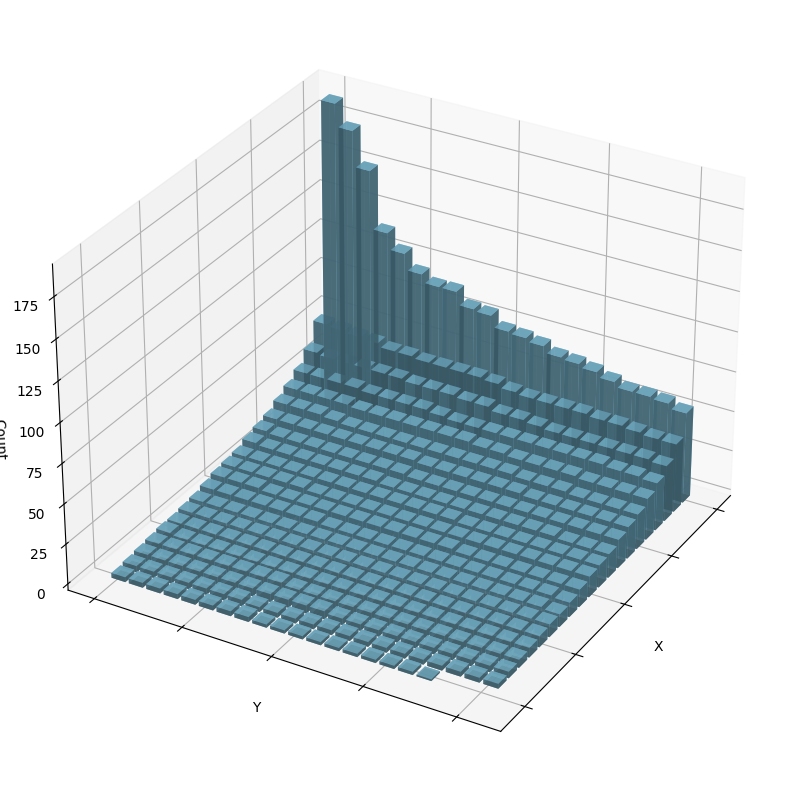

In [54]:
csv_file_path = 'SeaTurtle_metadata_train.csv'
analysis_identity_distribute(csv_file_path)

In [2]:
from numpy import pad

def square_mirror_padding(img):
    h, w = img.shape[:2]
    max_dim = max(h, w)
    
    pad_h = (max_dim - h) // 2
    pad_w = (max_dim - w) // 2
    
    pad_h_extra = max_dim - h - 2 * pad_h
    pad_w_extra = max_dim - w - 2 * pad_w
    
    padded = cv2.copyMakeBorder(
        img, 
        pad_h, pad_h + pad_h_extra, 
        pad_w, pad_w + pad_w_extra, 
        cv2.BORDER_REFLECT
    )
    return padded

def square_adaptive_padding(img):
    h, w = img.shape[:2]
    max_dim = max(h, w)
    
    padded = np.zeros((max_dim, max_dim, 3), dtype=np.uint8)
    
    edge_pixels = []
    if h >= 20:
        edge_pixels.extend(img[:10, :].reshape(-1, 3))
        edge_pixels.extend(img[-10:, :].reshape(-1, 3))
    if w >= 20:
        edge_pixels.extend(img[:, :10].reshape(-1, 3))
        edge_pixels.extend(img[:, -10:].reshape(-1, 3))
    
    if edge_pixels:
        edge_color = np.mean(edge_pixels, axis=0).astype(np.uint8)
    else:
        edge_color = np.array([0, 0, 0], dtype=np.uint8)
    
    padded[:] = edge_color
    
    start_h = (max_dim - h) // 2
    start_w = (max_dim - w) // 2
    padded[start_h:start_h+h, start_w:start_w+w] = img
    
    return padded

def process_images(folder_path):
    # Get all image files in the folder
    image_files = [f for f in os.listdir(folder_path) 
                  if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    
    if not image_files:
        print(f"No image files found in {folder_path}")
        return
    
    # Process first few images
    for i, image_file in enumerate(image_files[:5]):  # Limit to 5 images
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path)
        
        if img is None:
            print(f"Could not read image: {image_path}")
            continue
        
        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        mirror_padded = square_mirror_padding(img)
        adaptive_padded = square_adaptive_padding(img)
        
        plt.figure(figsize=(8, 4))
        
        plt.subplot(1, 3, 1)
        plt.imshow(img)
        plt.title(f'Original ({img.shape[1]}x{img.shape[0]})')
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.imshow(mirror_padded)
        plt.title(f'Mirror Padding ({mirror_padded.shape[1]}x{mirror_padded.shape[0]})')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.imshow(adaptive_padded)
        plt.title(f'Adaptive Padding ({adaptive_padded.shape[1]}x{adaptive_padded.shape[0]})')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

In [20]:
folder_path = "./autodl-tmp/sample_images"
process_images(folder_path)

FileNotFoundError: [Errno 2] No such file or directory: './autodl-tmp/sample_images'

In [3]:
def square_adaptive_padding(img):
    """Apply adaptive padding to make image square"""
    h, w = img.shape[:2]
    max_dim = max(h, w)
    
    # Create empty canvas
    padded = np.zeros((max_dim, max_dim, 3), dtype=np.uint8)
    
    # Calculate edge pixels average color (using edge 10 pixels)
    edge_pixels = []
    if h >= 20:  # Make sure there are enough pixels to calculate
        edge_pixels.extend(img[:10, :].reshape(-1, 3))
        edge_pixels.extend(img[-10:, :].reshape(-1, 3))
    if w >= 20:
        edge_pixels.extend(img[:, :10].reshape(-1, 3))
        edge_pixels.extend(img[:, -10:].reshape(-1, 3))
    
    if edge_pixels:
        edge_color = np.mean(edge_pixels, axis=0).astype(np.uint8)
    else:
        edge_color = np.array([0, 0, 0], dtype=np.uint8)
    
    # Fill with edge color
    padded[:] = edge_color
    
    # Place original image in center
    start_h = (max_dim - h) // 2
    start_w = (max_dim - w) // 2
    padded[start_h:start_h+h, start_w:start_w+w] = img
    
    return padded

def process_padding(input_csv, input_path, output_path, target_size=384):
    """
    Process all images in CSV:
    1. Apply adaptive padding to make square
    2. Resize to target_size with minimal loss of information
    3. Maintain directory structure
    """
    # Read CSV file
    df = pd.read_csv(input_csv)
    total_images = len(df)
    print(f"Total images to process: {total_images}")
    
    # Count for processed images and errors
    processed_count = 0
    error_count = 0
    
    # Process each image
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Processing images"):
        # Get input path
        rel_path = row['path']
        input_img_path = os.path.join(input_path, rel_path)
        
        # Create output path with exactly the same relative path
        output_img_path = os.path.join(output_path, rel_path)
        
        # Create output directory if it doesn't exist
        os.makedirs(os.path.dirname(output_img_path), exist_ok=True)
        
        try:
            # Read the image
            img = cv2.imread(input_img_path)
            
            if img is None:
                print(f"Error: Could not read {input_img_path}")
                error_count += 1
                continue
                
            # Step 1: Apply adaptive padding to make square
            square_img = square_adaptive_padding(img)
            
            # Step 2: Resize to target size using INTER_LANCZOS4 for high quality downscaling
            # or INTER_CUBIC for upscaling - automatically choose the best method
            if square_img.shape[0] > target_size:
                # Downscaling - use LANCZOS4 for better quality
                final_img = cv2.resize(square_img, (target_size, target_size), interpolation=cv2.INTER_LANCZOS4)
            else:
                # Upscaling - use CUBIC for better quality
                final_img = cv2.resize(square_img, (target_size, target_size), interpolation=cv2.INTER_CUBIC)
            
            # Save processed image with original filename and format
            cv2.imwrite(output_img_path, final_img)
            processed_count += 1
            
        except Exception as e:
            print(f"Error processing {input_img_path}: {e}")
            error_count += 1
    
    print(f"Processing complete: {processed_count} images processed, {error_count} errors")
    print(f"Padded images saved to {output_path}")

In [7]:
input_csv = "SeaTurtle_size_clean.csv"
input_path = "./autodl-tmp"
output_path = "./autodl-tmp/padded_images"

print(f"Starting adaptive padding process...")
print(f"Input CSV: {input_csv}")
print(f"Input base path: {input_path}")
print(f"Output base path: {output_path}")

process_padding(input_csv, input_path, output_path)

Starting adaptive padding process...
Input CSV: SeaTurtle_size_clean.csv
Input base path: ./autodl-tmp
Output base path: ./autodl-tmp/padded_images
Total images to process: 6472


Processing images: 100%|██████████| 6472/6472 [00:57<00:00, 112.49it/s]

Processing complete: 6472 images processed, 0 errors
Padded images saved to ./autodl-tmp/padded_images
